# Restricting Parameter Values

Typically, we don't want to restrict our parameter values both because we don't need to and because it can affect our accuracy. However, there may be times where we need to due to some limitation or another.

Let's try to fit and plot a function exactly the way we did before, but using a different function this time.

In [2]:
#Imports
import numpy as np
import lmfit as lf
import matplotlib.pyplot as plt
import scipy.optimize as opt

### Setup

For this demonstration, we're going to set up our function so that two things are true:
- The function is undefined in some regions
- One of our parameters is close to a value for which the function is undefined at some point within our domain, but the true value won't make the function undefined.

The function will be *y = v(r) = (G M r)*<sup>1/2</sup>

Our domain is going to be from *r = 0.1* to *r = 5*.</br>
Our parameter <i>M</i> is going to be positive and very large.</br>
So, our parameter *G* must be positive for the function to stay defined for our entire domain. We will make it very small so that it is near negative numbers, for which the function is not defined across all of our domain.

In [4]:
#Fakedata
rdata = np.linspace(0.1,5,50)
ydata = np.zeros(len(rdata))
noise = np.random.normal(0,1,len(rdata))
for i,n in enumerate(rdata):
    ydata[i] = np.sqrt(4.3e-6*2.7e9/n)+noise[i]
sigdata = np.ones(len(rdata))
weighdata = 1/sigdata

#Function
def v(r,G,M):
    return np.sqrt(G*M/r)

#For Plotting
ycurve = np.sqrt(4.3e-6*2.7e9/rdata)

In [5]:
#Initial Guesses
p0 = [4.3e-6,2.7e9]
bounds = [0,np.inf]

#Do fit
s_fit = opt.curve_fit(v,rdata,ydata,p0,sigma=sigdata,absolute_sigma=True)

#Define parameters from fit. Our parameters are stored in the first array in our fit output, in the order they were listed in f.
s_G = s_fit[0][0]
s_M = s_fit[0][1]
#s_c = s_fit[0][2]

#Define error from fit.
s_cov = s_fit[1]                    #The second array in the fit output is a covariance matrix.
s_error = np.sqrt(np.diag(s_cov)) #The diagonals of the covariance matrix are the variances of individual parameters.
s_Ge = s_error[0]                   #The errors will be in an order corresponding to the order of the parameters in their array
s_Me = s_error[1]
#s_ce = s_error[2]

#Create array to plot
s_curve = np.sqrt(s_G*s_M/rdata)

#Print Values
print('G: '+str(s_G)+u' \u00B1 '+str(s_Ge))
print('M: '+str(s_M)+u' \u00B1 '+str(s_Me))

G: 4.267743727769084e-06 ± 4.768293093117614
M: 2725117457.7130733 ± 3044737355478474.0


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in sqrt
  if sys.path[0] == '':


These values aren't bad, although their errors are quite high.
We're not going to worry about that for this tutorial, but it's a good thing to keep track of.

You should notice, however, that we get a RuntimeWarning. Even though all of our true values are fine, it's getting a negative number within the square root somewhere.

Well, it ran, so let's keep going and see how lmfit handles it.

In [7]:
#Setup
l_mod = lf.Model(v)
params = l_mod.make_params(G=4.3e-6,M=2.7e9)

#Do fit
l_fit = l_mod.fit(ydata, params, r=rdata, weights=weighdata)

#Define Stuff
l_dict = l_fit.best_values
l_G = l_dict['G']
l_M = l_dict['M']

#Create array to plot
l_curve = np.sqrt(l_G*l_M/rdata)

l_fit #Display information about the fit

ValueError: The input contains nan values

It seems lmfit won't run at all.

In [33]:
#Initial Guesses
p0 = [4.3e-6,2.7e9]
bounds = [0,np.inf]

#Do fit
s_fit = opt.curve_fit(v,rdata,ydata,p0,bounds=bounds,sigma=sigdata,absolute_sigma=True) #absolute_sigma is set so that uncertainties aren't treated as percentages.
#print(s_fit) #If we uncomment this line, we see that s_fit is an array containing two arrays.

#Define parameters from fit. Our parameters are stored in the first array in our fit output, in the order they were listed in f.
s_G = s_fit[0][0]
s_M = s_fit[0][1]
#s_c = s_fit[0][2]

#Define error from fit.
s_cov = s_fit[1]                    #The second array in the fit output is a covariance matrix.
s_error = np.sqrt(np.diag(s_cov)) #The diagonals of the covariance matrix are the variances of individual parameters.
s_Ge = s_error[0]                   #The errors will be in an order corresponding to the order of the parameters in their array
s_Me = s_error[1]
#s_ce = s_error[2]

#Create array to plot
s_curve = np.sqrt(s_G*s_M/rdata)

#Print Values
print('G: '+str(s_G)+u' \u00B1 '+str(s_Ge))
print('M: '+str(s_M)+u' \u00B1 '+str(s_Me))
#print('c: '+str(s_c)+u' \u00B1 '+str(s_ce))

G: 4.300003489684221e-06 ± 1.1909483580874105e-08
M: 2699968190.053765 ± 1.8983611888211082e-23


In [34]:
#Setup
weighdata = 1/sigdata                       #We will need weights for lmfit. This tells us how much to account for a single data point in the fit.
l_mod = lf.Model(v)                         #Tell lmfit that we want to model the function f
params = l_mod.make_params()   #Give lmfit our initial guesses - again, the true function
params.add('G', value=4.3e-6, min=0)
params.add('M', value=2.7e9, min=0)

#Do fit
l_fit = l_mod.fit(ydata, params, r=rdata, weights=weighdata, nan_policy='omit') #Here is where the weights we set at the beginning come in.

#Define Stuff
l_dict = l_fit.best_values #l_fit has a lot of output. We want to use the final result.
l_G = l_dict['G']          #Dictionary items are called based on their name.
l_M = l_dict['M']          #So, we don't have to track the order of parameters.
#l_c = l_dict['c']

#Create array to plot
l_curve = np.sqrt(l_G*rdata+l_M/rdata)

l_fit #Display information about the fit

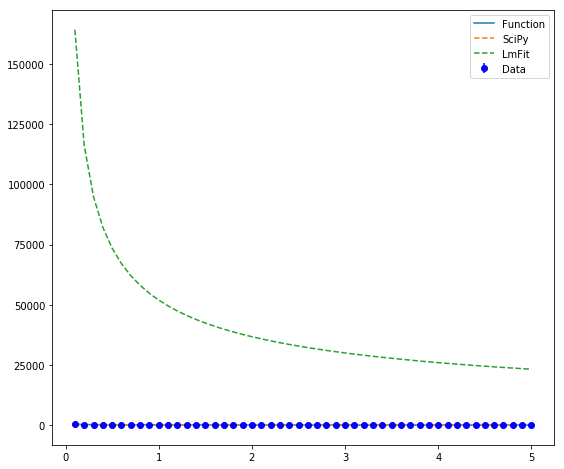

In [36]:
#Plotting

fig = plt.figure(figsize=(9.0,8.0))                #size of the plot

plt.errorbar(rdata,ydata,yerr=sigdata,fmt='bo',label='Data') #Plot points (fmt='*o') with error bars
plt.plot(rdata,ycurve,label='Function')                      #Accepting default style gives us a solid line
plt.plot(rdata,s_curve,linestyle='--',label='SciPy')         #Plot the scipy curve fit with a dashed line
plt.plot(rdata,l_curve,linestyle='--',label='LmFit')

plt.legend()           #Tells our plot to show a legend
plt.show()             #Depending how your environment is set up, this line may not be necessary, but it won't break anything.